## Installation of yfinance for scrapping data of stocks

In [2]:
# pip install yfinance

## Importing google data with proper column name 

In [4]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the ticker symbol for Google
ticker_symbol = 'GOOG'

# Download historical data
google_data = yf.download(ticker_symbol, start="2018-01-01", end="2023-01-01")

# Flatten the multi-level column names and rename them
google_data.columns = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']

# Display the first few rows of the cleaned data
print(google_data.head())

[*********************100%%**********************]  1 of 1 completed

            Adj Close      Close       High        Low       Open    Volume
Date                                                                       
2018-01-02  52.417000  53.347000  52.261501  53.250000  53.119549  24752000
2018-01-03  53.215500  54.314499  53.160500  54.124001  53.991409  28604000
2018-01-04  54.400002  54.678501  54.200100  54.320000  54.186924  20092000
2018-01-05  54.700001  55.212502  54.599998  55.111500  54.976486  25582000
2018-01-08  55.111500  55.563499  55.081001  55.347000  55.211411  20952000


### Google Stock Data Summary

This section provides a detailed statistical summary of key columns in the Google stock dataset: `Adj Close`, `Close`, `High`, `Low`, `Open`, and `Volume`.

#### Column Descriptions
- **Adj Close**: Adjusted closing price after accounting for corporate actions (e.g., dividends or stock splits).
- **Close**: Final trading price at the close of each day.
- **High**: Highest price reached during each trading day.
- **Low**: Lowest price reached during each trading day.
- **Open**: Initial trading price at the start of each day.
- **Volume**: Number of shares traded each day.


In [6]:
google_data.shape

(1259, 6)

#### we have 1259 raws and 6 columns in our dataset. Futher, we can add more columns accoeding to requirement

In [8]:
google_data.describe()

,Adj Close,Close,High,Low,Open,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,85.934908,86.904425,85.013517,85.966515,85.755914,3.097583e+07
std,31.280206,31.583414,30.936244,31.244992,31.168448,1.349904e+07
min,48.695000,50.176998,48.505501,48.811001,48.691425,6.936000e+06
25%,58.500999,58.926374,57.890749,58.421999,58.278875,2.228700e+07
50%,73.587502,74.487503,72.994003,73.811501,73.630676,2.773400e+07
75%,113.261749,114.805000,112.139000,113.317753,113.040146,3.531200e+07
max,151.863495,152.100006,149.887497,150.709000,150.339783,1.241400e+08


#### Detailed Breakdown of Each Statistical Measure

- **Count**:  
   There are 1,259 data points in each column, representing 1,259 trading days in the dataset.

- **Mean**:  
   - `Close` and `Adj Close` prices average around 85.76 and 85.97, respectively.
   - The average `High` price is 86.90, while the `Low` price averages 85.01, indicating typical daily price fluctuations around this range.
   - `Open` price has a mean of 85.93, aligning closely with `Close` and `Adj Close`.
   - The average `Volume` is approximately 30.98 million shares, indicating the daily trading activity.

- **Standard Deviation (Std)**:  
   - `Close`, `Adj Close`, `High`, `Low`, and `Open` columns have standard deviations around 31, meaning daily prices typically vary by about $31 from the mean.
   - `Volume` has a standard deviation of about 13.5 million, showing significant fluctuation in daily trading volumes.

- **Min and Max**:  
   - The minimum `Close` price is 48.81, while the maximum reached 150.71, showing a large range in Google’s stock price.
   - `High` peaked at 152.10, while `Low` dropped to 48.51.
   - `Open` ranged from 48.69 to 151.86.
   - `Volume` ranged widely, from 6.94 million to 124 million shares, indicating days with high trading activity, likely due to major events.

- **25%, 50%, and 75% Percentiles**:
   - **25% Percentile**:  
      - For `Close`, 25% of the values are below 58.42, suggesting that a significant portion of the dataset has lower prices than the mean.
      - `Volume` shows that 25% of trading days had fewer than 22.29 million shares traded.

   - **50% (Median)**:  
      - The median `Close` price is 73.81, slightly below the mean, suggesting recent higher prices have pulled up the mean.
      - The median `Volume` is 27.73 million, meaning half the trading days had volumes below this, while the other half exceeded it.

   - **75% Percentile**:  
      - The 75th percentile `Close` price is 113.32, indicating that 25% of trading days had significantly higher prices, skewing the distribution.
      - The 75th percentile for `Volume` is 35.31 million, showing that more active trading days tend to have higher volumes.

In summary, these statistics provide a snapshot of the stock’s historical behavior. Google’s stock prices and trading volumes show a range of variability over this period, likely influenced by external factors and market trends. The data indicates upward price trends with periods of high trading activity, while the spread in volume highlights days of heightened investor interest.

In [10]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2018-01-02 to 2022-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  1259 non-null   float64
 1   Close      1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Open       1259 non-null   float64
 5   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.9 KB


#### Datatype is perfect for all columns so we dont need to do anythong for fixing it 

# Preprocessing stpes

## Fixing  date time formate

In [14]:
import pandas as pd

# Convert the index to datetime format and remove timezone information
google_data.index = pd.to_datetime(google_data.index).strftime('%Y-%m-%d')

# Display the first few rows of the cleaned data
print(google_data.head())


            Adj Close      Close       High        Low       Open    Volume
Date                                                                       
2018-01-02  52.417000  53.347000  52.261501  53.250000  53.119549  24752000
2018-01-03  53.215500  54.314499  53.160500  54.124001  53.991409  28604000
2018-01-04  54.400002  54.678501  54.200100  54.320000  54.186924  20092000
2018-01-05  54.700001  55.212502  54.599998  55.111500  54.976486  25582000
2018-01-08  55.111500  55.563499  55.081001  55.347000  55.211411  20952000


## 1. Cheking for null values

In [16]:
# Check for missing values
missing_values = google_data.isnull().sum()
print("Missing values in each column:\n", missing_values)



Missing values in each column:
 Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64


##### we don't have any null value so we don't need to perform any stpes for fixing null valueA

## 2.Feature Engineering: Creating New Predictive Variables
##### Adding additional features can improve model performance. Here are some commonly used engineered features for stock data.


##### a. Daily Returns
Calculate the daily percentage return, which can help the model understand daily trends.

In [20]:
# Calculate daily returns and add as a new feature
google_data['Daily_Return'] = google_data['Close'].pct_change()
google_data['Daily_Return'].fillna(0, inplace=True)


C:\Users\Amrit\AppData\Local\Temp\ipykernel_9436\1852509146.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  google_data['Daily_Return'].fillna(0, inplace=True)


##### b. Volatility (Rolling Standard Deviation of Returns)
Volatility (or the rolling standard deviation of returns) is a measure of how much the stock price varies and is often an important feature.

In [22]:
# Calculate 20-day rolling volatility (standard deviation of daily returns)
google_data['Volatility_20'] = google_data['Daily_Return'].rolling(window=20).std()
google_data['Volatility_20'].fillna(0, inplace=True)


C:\Users\Amrit\AppData\Local\Temp\ipykernel_9436\1054092055.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  google_data['Volatility_20'].fillna(0, inplace=True)


##### c. Moving Average Convergence Divergence (MACD)
MACD is a trend-following indicator, calculated as the difference between the 26-day and 12-day exponential moving averages.

In [24]:
# Calculate MACD
google_data['EMA_12'] = google_data['Close'].ewm(span=12, adjust=False).mean()
google_data['EMA_26'] = google_data['Close'].ewm(span=26, adjust=False).mean()
google_data['MACD'] = google_data['EMA_12'] - google_data['EMA_26']


In [25]:
google_data.head(5)

,Adj Close,Close,High,Low,Open,Volume,Daily_Return,Volatility_20,EMA_12,EMA_26,MACD
Date,,,,,,,,,,,
2018-01-02,52.417000,53.347000,52.261501,53.250000,53.119549,24752000,0.000000,0.0,53.347000,53.347000,0.000000
2018-01-03,53.215500,54.314499,53.160500,54.124001,53.991409,28604000,0.018136,0.0,53.495846,53.418667,0.077179
2018-01-04,54.400002,54.678501,54.200100,54.320000,54.186924,20092000,0.006702,0.0,53.677793,53.511988,0.165805
2018-01-05,54.700001,55.212502,54.599998,55.111500,54.976486,25582000,0.009766,0.0,53.913902,53.637952,0.275950
2018-01-08,55.111500,55.563499,55.081001,55.347000,55.211411,20952000,0.006357,0.0,54.167686,53.780585,0.387101


##### d. Add Technical Indicators (Optional, for Stock Analysis)

In [27]:
# Calculate 20-day and 50-day moving averages
google_data['MA_20'] = google_data['Close'].rolling(window=20).mean()
google_data['MA_50'] = google_data['Close'].rolling(window=50).mean()

# Display the first few rows to verify the moving averages
print("Data with moving averages:\n", google_data[['Close', 'MA_20', 'MA_50']].head(60))


Data with moving averages:
                 Close      MA_20      MA_50
Date                                       
2018-01-02  53.347000        NaN        NaN
2018-01-03  54.314499        NaN        NaN
2018-01-04  54.678501        NaN        NaN
2018-01-05  55.212502        NaN        NaN
2018-01-08  55.563499        NaN        NaN
2018-01-09  55.528500        NaN        NaN
2018-01-10  55.230000        NaN        NaN
2018-01-11  55.326248        NaN        NaN
2018-01-12  56.214500        NaN        NaN
2018-01-16  56.995499        NaN        NaN
2018-01-17  56.630001        NaN        NaN
2018-01-18  56.625500        NaN        NaN
2018-01-19  56.893002        NaN        NaN
2018-01-22  57.993999        NaN        NaN
2018-01-23  58.581348        NaN        NaN
2018-01-24  58.993000        NaN        NaN
2018-01-25  58.797001        NaN        NaN
2018-01-26  58.792000        NaN        NaN
2018-01-29  59.344501        NaN        NaN
2018-01-30  58.826000  56.694355        NaN
2018


#### Moving Averages: .rolling(window=20).mean() calculates a 20-day moving average. Similarly, .rolling(window=50).mean() calculates a 50-day moving average.


 #### After running this code, the first 19 rows for MA_20 and the first 49 rows for MA_50 will contain NaN values, as there aren’t enough data points to compute the moving average for those initial rows.

#### Handle NaN Values in Moving Averages
Here are some strategies to handle these NaN values:

1.Drop NaN Values: You can drop rows with NaN values in the moving average columns. This is a common approach, especially when these initial values are not needed in the analysis or modeling.

2.Fill NaN Values: If you prefer to keep all rows, you can fill NaN values using a method such as forward fill, backward fill, or by filling with a specific value. However, filling with specific values can distort the initial part of the data, so it's less common in financial analysis.

## we decide to go with drop of null values as we dont want to deal with bias and missleading result

In [32]:
# Drop rows with NaN values in the moving averages
google_data.dropna(subset=['MA_20', 'MA_50'], inplace=True)

# Verify the data after dropping NaNs
print("Data after dropping NaN values:\n", google_data.head(10))

Data after dropping NaN values:
             Adj Close      Close       High        Low       Open    Volume  \
Date                                                                          
2018-03-14  57.260502  57.929501  57.071999  57.474499  57.333694  25828000   
2018-03-15  57.498001  58.054001  56.727001  57.479000  57.338188  27908000   
2018-03-16  57.707001  57.793999  56.598000  56.786499  56.647381  61840000   
2018-03-19  56.000500  56.099499  54.450500  54.991001  54.856281  56118000   
2018-03-20  54.950001  55.259998  54.173000  54.885502  54.751045  36638000   
2018-03-21  54.637001  55.314999  54.257500  54.543999  54.410378  37578000   
2018-03-22  54.094002  54.145000  52.295502  52.453999  52.325497  53340000   
2018-03-23  52.351501  53.167999  51.061001  51.078499  50.953365  43134000   
2018-03-26  52.299999  52.781502  50.419998  52.660500  52.531494  53302000   
2018-03-27  53.150002  53.241951  49.846001  50.255001  50.131889  61906000   

            Daily_

### final view of dataset

In [34]:
google_data

,Adj Close,Close,High,Low,Open,Volume,Daily_Return,Volatility_20,EMA_12,EMA_26,MACD,MA_20,MA_50
Date,,,,,,,,,,,,,
2018-03-14,57.260502,57.929501,57.071999,57.474499,57.333694,25828000,-0.015441,0.014188,56.974814,56.348939,0.625875,56.213770,56.12927
2018-03-15,57.498001,58.054001,56.727001,57.479000,57.338188,27908000,0.002149,0.014070,57.140842,56.475239,0.665603,56.437170,56.22341
2018-03-16,57.707001,57.793999,56.598000,56.786499,56.647381,61840000,-0.004479,0.013772,57.241328,56.572925,0.668403,56.598173,56.29300
2018-03-19,56.000500,56.099499,54.450500,54.991001,54.856281,56118000,-0.029320,0.015349,57.065662,56.537857,0.527805,56.641472,56.32142
2018-03-20,54.950001,55.259998,54.173000,54.885502,54.751045,36638000,-0.014964,0.015634,56.787868,56.443200,0.344667,56.619597,56.32237
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,87.620003,90.099998,87.620003,89.809998,89.589981,17815000,0.010316,0.024956,92.829011,94.987506,-2.158495,95.844500,96.74852
2022-12-27,89.309998,89.500000,87.535004,87.930000,87.714592,15470900,-0.006659,0.024911,92.316855,94.581024,-2.264169,95.427999,96.51272
2022-12-28,87.500000,88.519997,86.370003,86.459999,86.248192,17879600,-0.010950,0.024841,91.732723,94.132059,-2.399336,95.034499,96.24772


### Again null value check

In [36]:
google_data.isnull().sum()

Adj Close        0
Close            0
High             0
Low              0
Open             0
Volume           0
Daily_Return     0
Volatility_20    0
EMA_12           0
EMA_26           0
MACD             0
MA_20            0
MA_50            0
dtype: int64

# 3. Feature Importance with Correlation Matrix
A correlation matrix can help identify features most closely related to the target variable (Close in this case).

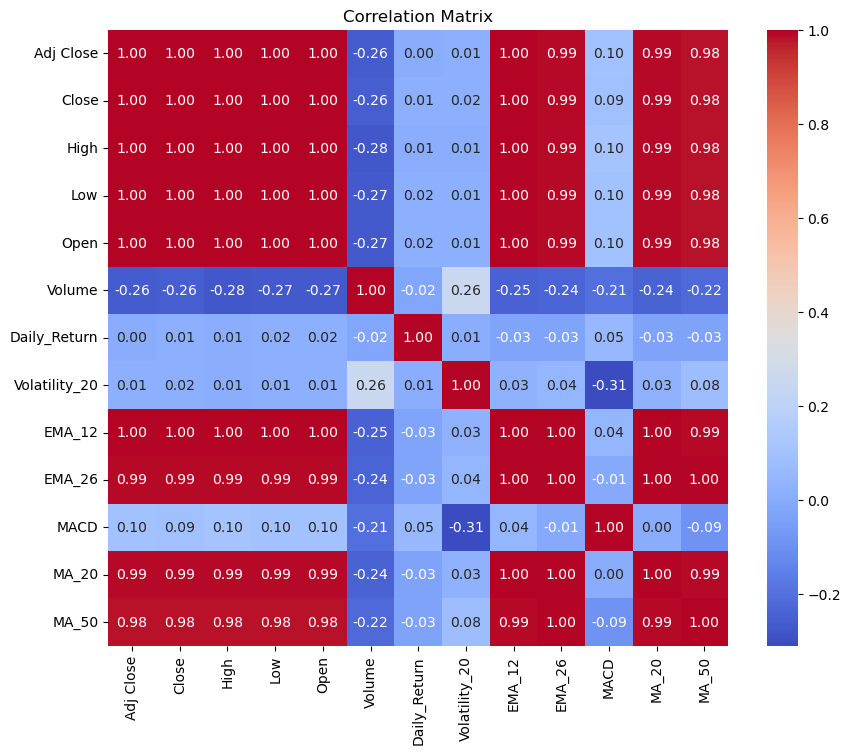

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate and display correlation matrix
correlation_matrix = google_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

ce trends.

---

# Explanation of Your Output

### Correlation Values
- **Adj Close:** 1.000000  
  The adjusted close price is perfectly correlated with the close price because it represents the same information adjusted for factors such as dividends and stock splits.

- **Close:** 1.000000  
  This is the target variable itself, so it has a perfect correlation with itself.

- **High:** 0.999526  
  The high price of the stock is almost perfectly correlated with the close price. This suggests that when the closing price is high, the high price tends to be high as well.

- **Low:** 0.999567  
  Similarly, the low price also shows a very high correlation with the close price, indicating that if the closing price is lower, the low price also tends to be lower.

- **Open:** 0.999012  
  The opening price has a strong positive correlation with the close price. This indicates that if the opening price is high, the closing price tends to be high too, suggesting consistency throughout the trading day.

- **Volume:** -0.267848  
  Volume shows a weak negative correlation with the close price. This implies that higher trading volumes do not necessarily correspond to higher closing prices, and the relationship may be weak and potentially due to external factors influencing trading behavior.

- **Daily Return:** 0.016884  
  The daily return has a very weak positive correlation with the close price, indicating that changes in daily return have minimal predictive power for the closing price.

- **Volatility_20:** -0.046618  
  Volatility shows a very weak negative correlation with the closing price, suggesting that increased volatility does not significantly affect the closing price.

- **EMA_12:** 0.996793 and **EMA_26:** 0.992857  
  The Exponential Moving Averages (EMA) also show a very strong positive correlation with the close price. This indicates that the short-term trends captured by these EMAs align closely with the closing price trends.

- **MA_20:** 0.992564 and **MA_50:** 0.981966  
  The 20-day and 50-day moving averages show strong positive correlations with the closing price, suggesting that they are effective indicators of price trends over time.

---

# Potential Issues to Consider

## Multicollinearity
- Given the high correlations among the price-related features (Open, High, Low, Adj Close, Close), this can lead to multicollinearity issues in regression models, making it difficult to assess the individual contribution of each feature.

## Redundancy
- High correlation among features (like High, Low, and Close) may suggest redundancy. Including too many correlated variables can complicate model interpretation without significantly improving performance.

## Overfitting Risk
- If your model includes too many highly correlated features, it may perform well on training data but poorly on unseen data (test set) due to overfitting.

## Assumptions
- While high correlation can indicate a relationship, it does not imply causation. Just because twolectively contribute to your predictive modeling efforts without introducing unnecessary complexity.


# 4. Select columns which are highly correlated with target columns and remove columns which are higly correleted which each other for fixing Multicollinearity and overfitting

In [41]:
# Keeping selected features based on your updated analysis
selected_features = ['Close', 'Open', 'High', 'Low', 'Volume', 'EMA_12', 'MA_20']

# Creating a new DataFrame with the selected features
data_selected = google_data[selected_features]

# Now you can continue with your model training and evaluation using data_selected

In [42]:
data_selected

,Close,Open,High,Low,Volume,EMA_12,MA_20
Date,,,,,,,
2018-03-14,57.929501,57.333694,57.071999,57.474499,25828000,56.974814,56.213770
2018-03-15,58.054001,57.338188,56.727001,57.479000,27908000,57.140842,56.437170
2018-03-16,57.793999,56.647381,56.598000,56.786499,61840000,57.241328,56.598173
2018-03-19,56.099499,54.856281,54.450500,54.991001,56118000,57.065662,56.641472
2018-03-20,55.259998,54.751045,54.173000,54.885502,36638000,56.787868,56.619597
...,...,...,...,...,...,...,...
2022-12-23,90.099998,89.589981,87.620003,89.809998,17815000,92.829011,95.844500
2022-12-27,89.500000,87.714592,87.535004,87.930000,15470900,92.316855,95.427999
2022-12-28,88.519997,86.248192,86.370003,86.459999,17879600,91.732723,95.034499


## Explanation for Column Removals

Here’s a detailed explanation of why we removed certain columns based on their correlation with the **Close** price and concerns like multicollinearity and overfitting:

### 1. Adj Close
- **Reason for Removal**: The Adjusted Close price is calculated from the Close price, accounting for factors like dividends and stock splits. This means it will always have a perfect correlation (1.0) with Close, making it redundant. Including both would not provide any new information for the analysis.

### 2. EMA_26
- **Reason for Removal**: The Exponential Moving Average (EMA) over 26 days is highly correlated with the Close price (0.992857), but it doesn't add significant predictive power compared to EMA_12, which captures shorter-term trends. Keeping both could lead to multicollinearity, complicating the interpretation of their individual contributions to the model.

### 3. MA_50
- **Reason for Removal**: Similar to EMA_26, the 50-day Moving Average (MA_50) shows a strong correlation with Close (0.981966) but is less relevant for short-term analysis compared to the 20-day Moving Average (MA_20). Including MA_50 could again introduce redundancy and potentially confuse the model with multiple indicators reflecting similar trends.

### 4. Daily Return
- **Reason for Removal**: The correlation between Daily Return and Close is very low (0.016884), indicating that changes in daily returns do not effectively predict the closing price. This suggests that including this feature would add noise rather than valuable predictive information.

### 5. Volatility_20
- **Reason for Removal**: Like Daily Return, Volatility_20 shows a weak negative correlation with Close (-0.046618). This weak relationship implies that increased volatility does not significantly impact the closing price. Including such features could lead to overfitting, where the model learns noise in the data rather than the underlying pattern.

### Summary of Remaining Features
By focusing on the remaining features—**Close**, **Open**, **High**, **Low**, **Volume**, **EMA_12**, and **MA_20**—we streamline the dataset to include only the most relevant indicators. This helps to:
- **Reduce Complexity**: A simpler model is easier to interpret and understand.
- **Enhance Predictive Power**: Features that have demonstrated strong correlations with Close will likely improve model performance.
- **Minimize Overfitting Risk**: Reducing the number of features helps prevent the model from fitting noise in the training data, allowing it to generalize better to unseen data.

Overall, this approach ensures that we maintain a robust and efficient predictive modeling process while minimizing issues related to multicollinearity and overfitting.


# 5.Visulization

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style
sns.set(style='whitegrid')

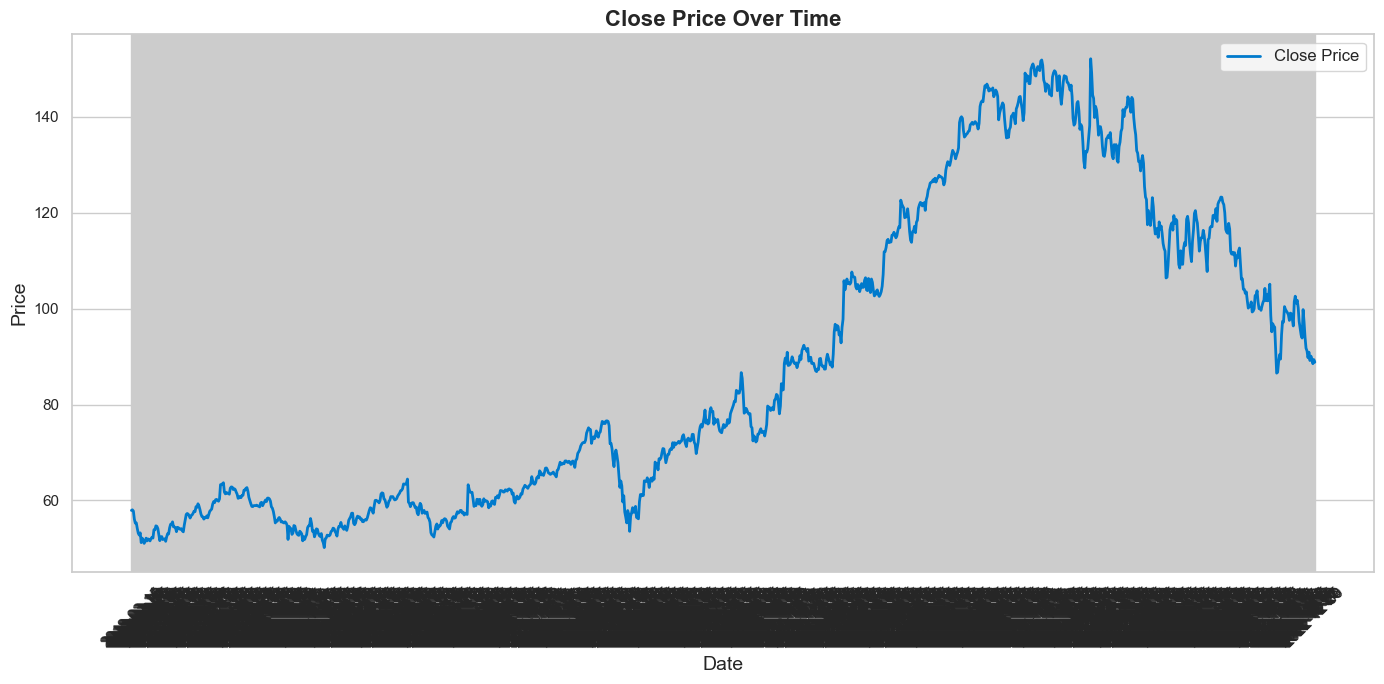

In [46]:
plt.figure(figsize=(14, 7))
plt.plot(data_selected['Close'], label='Close Price', color='#007acc', linewidth=2)
plt.title('Close Price Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=45)
plt.legend(fontsize=12)
plt.grid(visible=True)
plt.tight_layout()
plt.show()

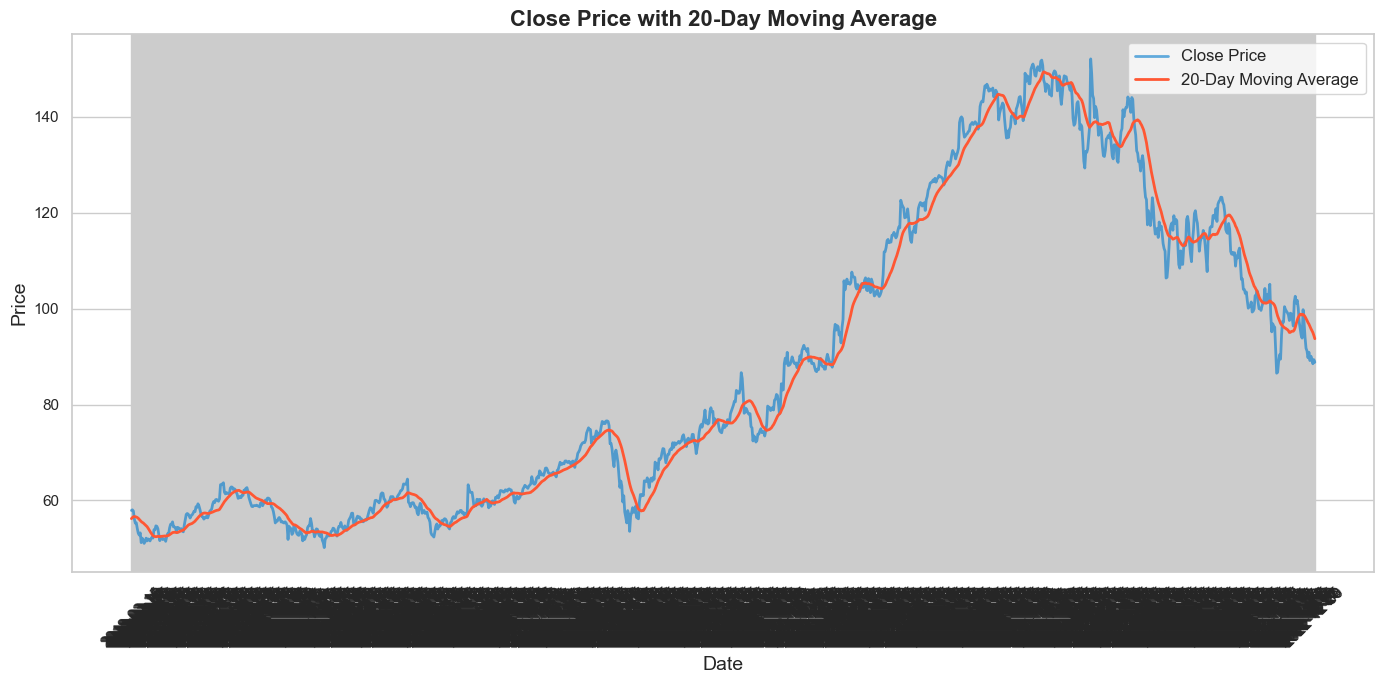

In [47]:
plt.figure(figsize=(14, 7))
plt.plot(data_selected['Close'], label='Close Price', color='#007acc', alpha=0.6, linewidth=2)
plt.plot(data_selected['MA_20'], label='20-Day Moving Average', color='#ff5733', linewidth=2)
plt.title('Close Price with 20-Day Moving Average', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=45)
plt.legend(fontsize=12)
plt.grid(visible=True)
plt.tight_layout()
plt.show()

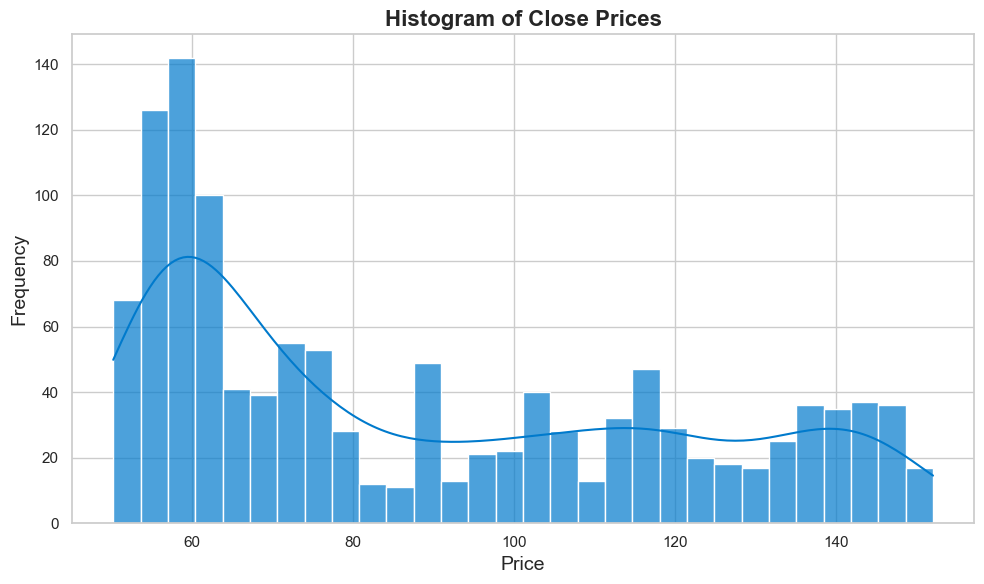

In [48]:
plt.figure(figsize=(10, 6))
sns.histplot(data_selected['Close'], bins=30, kde=True, color='#007acc', alpha=0.7)
plt.title('Histogram of Close Prices', fontsize=16, fontweight='bold')
plt.xlabel('Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(visible=True)
plt.tight_layout()
plt.show()

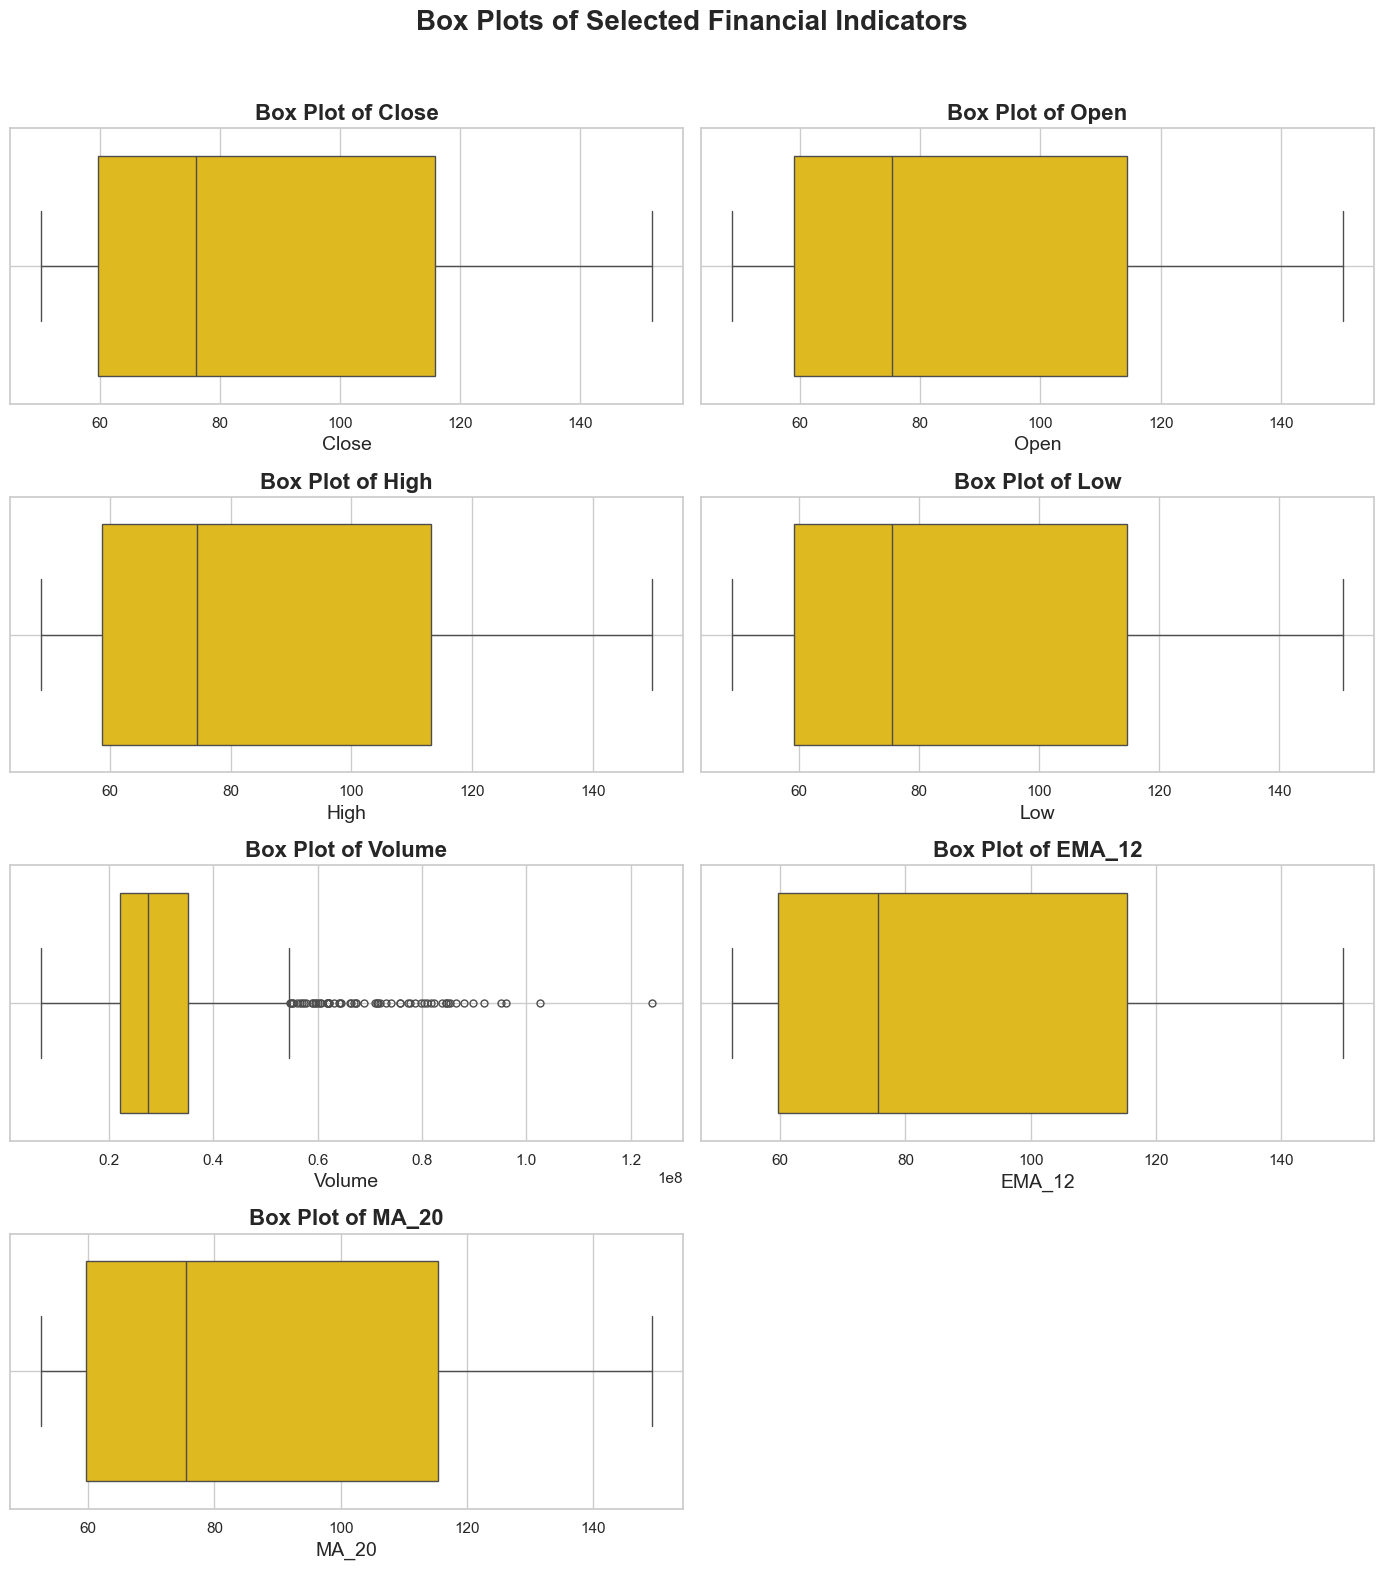

In [49]:
# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 16))
fig.suptitle('Box Plots of Selected Financial Indicators', fontsize=20, fontweight='bold')

# List of columns to plot
columns = ['Close', 'Open', 'High', 'Low', 'Volume', 'EMA_12', 'MA_20']

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each column and create a box plot
for i, column in enumerate(columns):
    sns.boxplot(x=data_selected[column], ax=axes[i], color='#ffcc00', fliersize=5)
    axes[i].set_title(f'Box Plot of {column}', fontsize=16, fontweight='bold')
    axes[i].set_xlabel(column, fontsize=14)
    axes[i].grid(visible=True)

# Hide the last subplot if there are any empty axes
if len(columns) < len(axes):
    axes[len(columns)].axis('off')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the title position
plt.show()

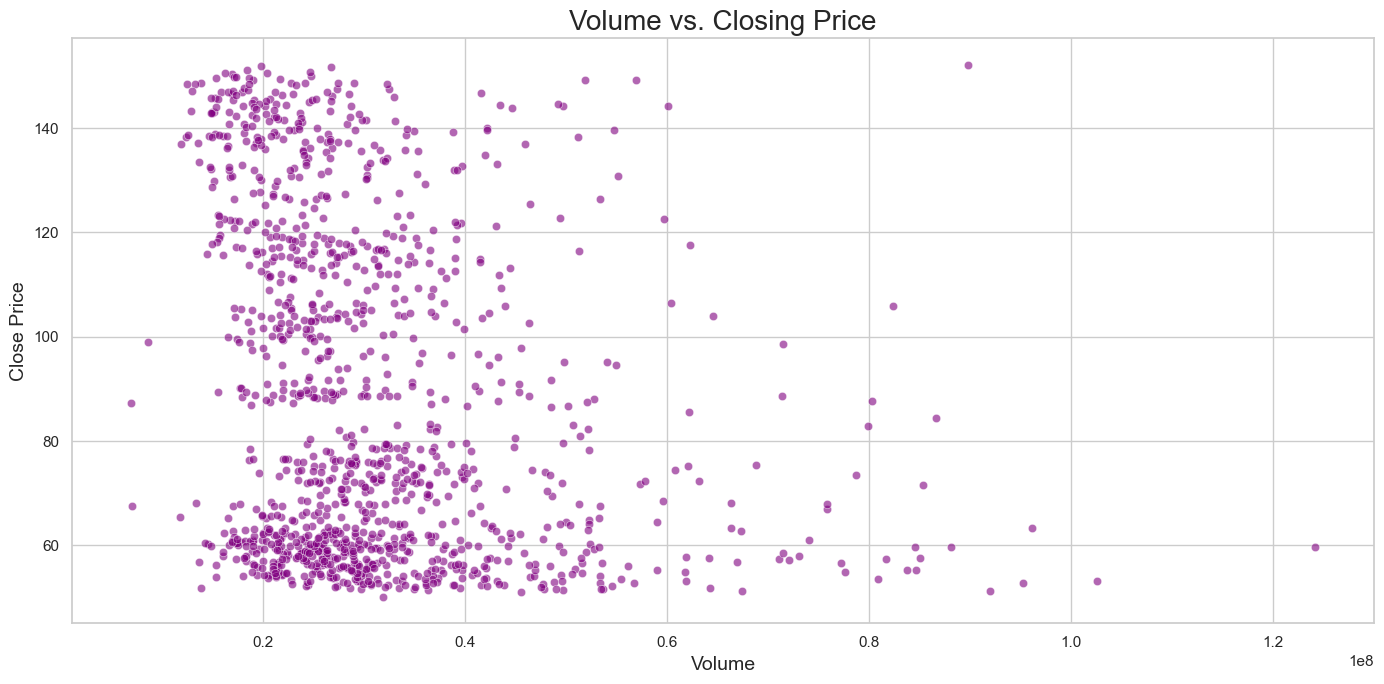

In [50]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x=data_selected['Volume'], y=data_selected['Close'], color='purple', alpha=0.6)
plt.title('Volume vs. Closing Price', fontsize=20)
plt.xlabel('Volume', fontsize=14)
plt.ylabel('Close Price', fontsize=14)
plt.grid(visible=True)
plt.tight_layout()
plt.show()

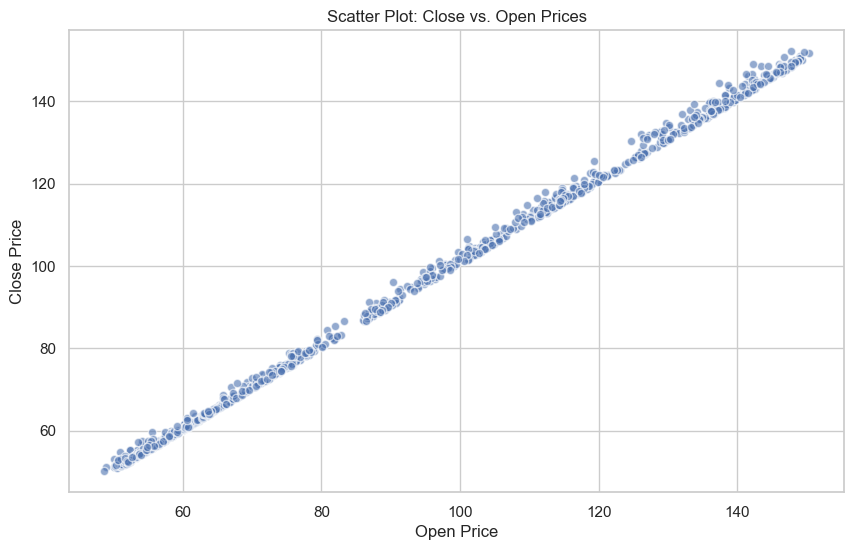

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(data_selected['Open'], data_selected['Close'], alpha=0.6, edgecolors='w')
plt.title('Scatter Plot: Close vs. Open Prices')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

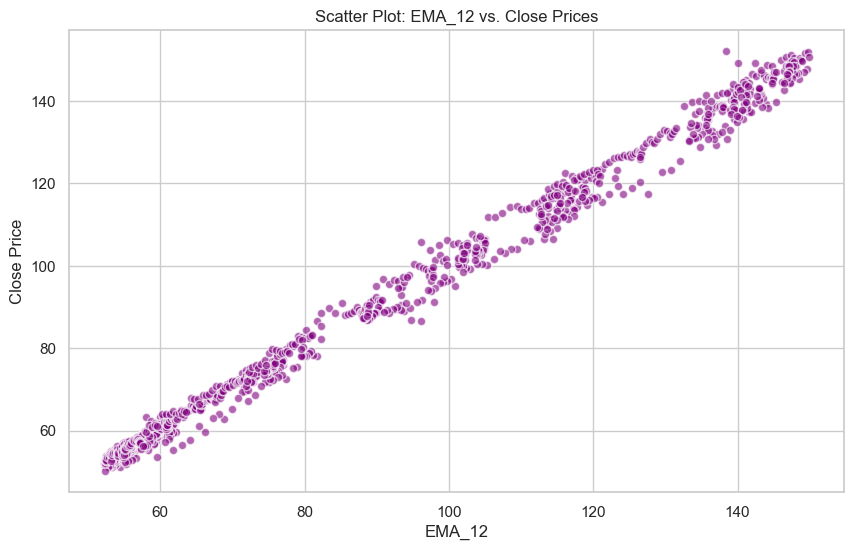

In [52]:
plt.figure(figsize=(10, 6))
plt.scatter(data_selected['EMA_12'], data_selected['Close'], color='purple', alpha=0.6, edgecolors='w')
plt.title('Scatter Plot: EMA_12 vs. Close Prices')
plt.xlabel('EMA_12')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

## 6. Outlier removal from volume

Original shape of dataset: (1210, 7)
Shape of dataset after removing outliers: (1148, 7)


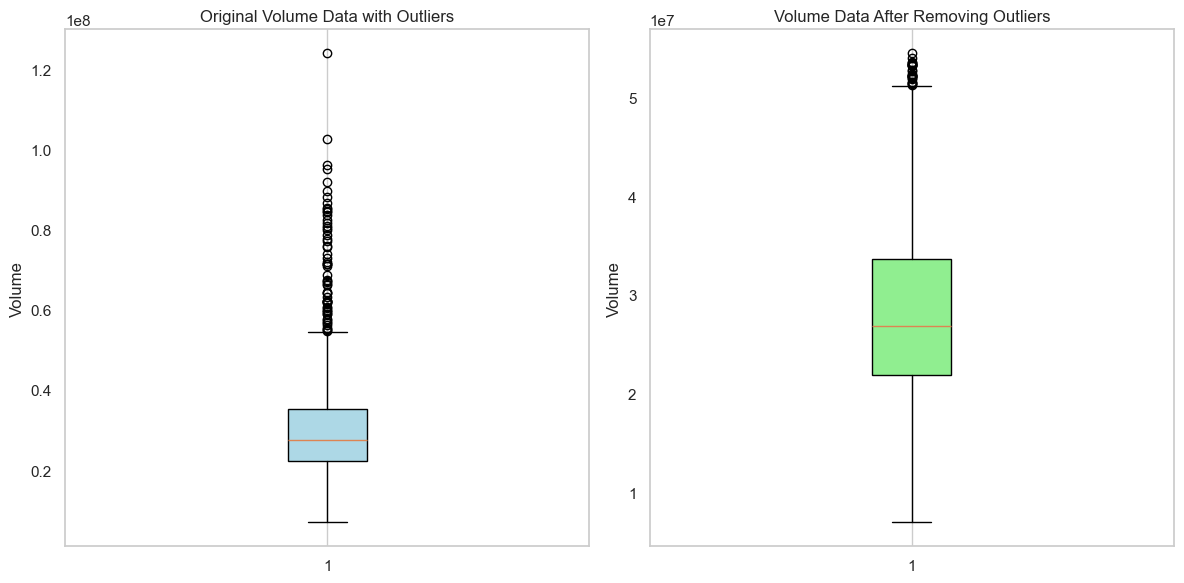

In [54]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for Volume
Q1 = data_selected['Volume'].quantile(0.25)
Q3 = data_selected['Volume'].quantile(0.75)
IQR = Q3 - Q1

# Determine the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a DataFrame without outliers
data_no_outliers = data_selected[(data_selected['Volume'] >= lower_bound) & (data_selected['Volume'] <= upper_bound)]

# Print shapes of original and outlier-removed datasets
print("Original shape of dataset:", data_selected.shape)
print("Shape of dataset after removing outliers:", data_no_outliers.shape)

# Visualizations

# Box Plot for Volume (Original Dataset)
plt.figure(figsize=(12, 6))

# Box Plot before removing outliers
plt.subplot(1, 2, 1)
plt.boxplot(data_selected['Volume'], patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Original Volume Data with Outliers')
plt.ylabel('Volume')
plt.grid(axis='y')

# Box Plot after removing outliers
plt.subplot(1, 2, 2)
plt.boxplot(data_no_outliers['Volume'], patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Volume Data After Removing Outliers')
plt.ylabel('Volume')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

In [55]:
data_no_outliers

,Close,Open,High,Low,Volume,EMA_12,MA_20
Date,,,,,,,
2018-03-14,57.929501,57.333694,57.071999,57.474499,25828000,56.974814,56.213770
2018-03-15,58.054001,57.338188,56.727001,57.479000,27908000,57.140842,56.437170
2018-03-20,55.259998,54.751045,54.173000,54.885502,36638000,56.787868,56.619597
2018-03-21,55.314999,54.410378,54.257500,54.543999,37578000,56.561272,56.550422
2018-03-22,54.145000,52.325497,52.295502,52.453999,53340000,56.189538,56.450622
...,...,...,...,...,...,...,...
2022-12-23,90.099998,89.589981,87.620003,89.809998,17815000,92.829011,95.844500
2022-12-27,89.500000,87.714592,87.535004,87.930000,15470900,92.316855,95.427999
2022-12-28,88.519997,86.248192,86.370003,86.459999,17879600,91.732723,95.034499


In [56]:
data_no_outliers.isnull().sum()

Close     0
Open      0
High      0
Low       0
Volume    0
EMA_12    0
MA_20     0
dtype: int64

# 7. Models

## Data peparation

In [59]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Prepare the dataset (selecting only the 'Close' price for forecasting)
data = data_selected[['Close']].copy()

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Function to create datasets for LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Parameters
time_step = 60  # Number of previous days to use for prediction

# Create datasets
X, y = create_dataset(scaled_data, time_step)

# Reshape X to be [samples, time steps, features] which is required for LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)

print(f"Dataset shape: {X.shape}, Target shape: {y.shape}")

Dataset shape: (1149, 60, 1), Target shape: (1149,)


## Data Split

In [61]:
# Splitting the dataset into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f"Training data shape: {X_train.shape}, Testing data shape: {X_test.shape}")

Training data shape: (919, 60, 1), Testing data shape: (230, 60, 1)


## LSTM MODEL

In [68]:
# pip install tensorflow

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 90ms/step - loss: 0.0669 - val_loss: 0.0080
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0074 - val_loss: 0.0020
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0034 - val_loss: 0.0011
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0026 - val_loss: 0.0010
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0028 - val_loss: 0.0010
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0027 - val_loss: 9.7060e-04
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0029 - val_loss: 9.2543e-04
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0025 - val_loss: 9.1932e-04
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0026 - val_loss: 0.0015
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0024 - val_loss: 0.0011
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0022 - val_loss: 0.0026
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━

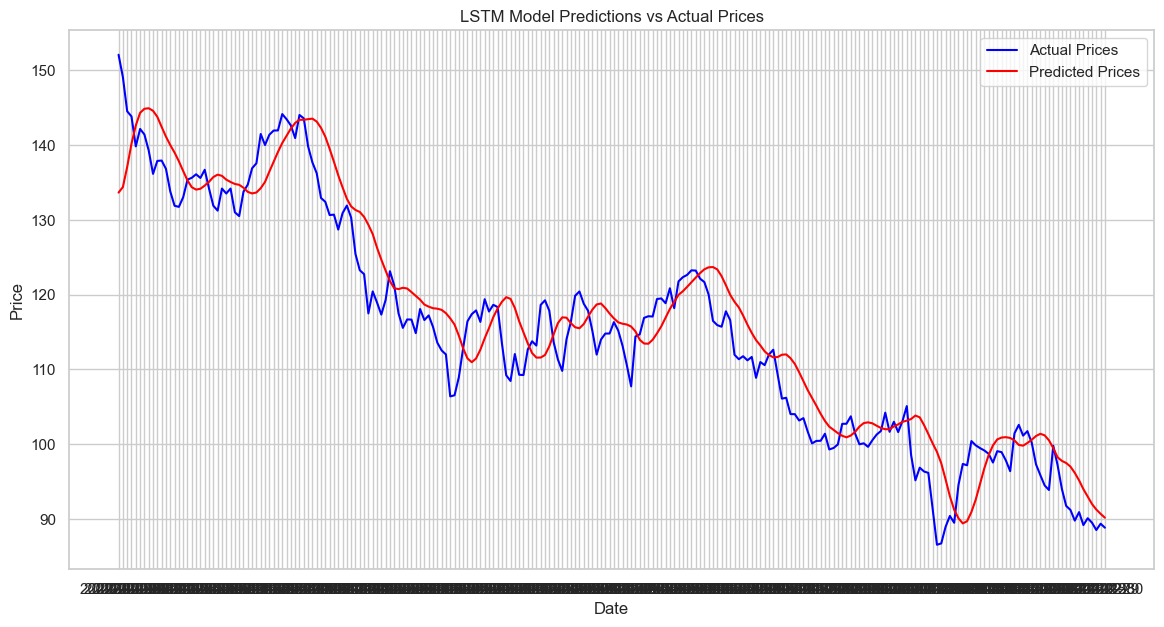

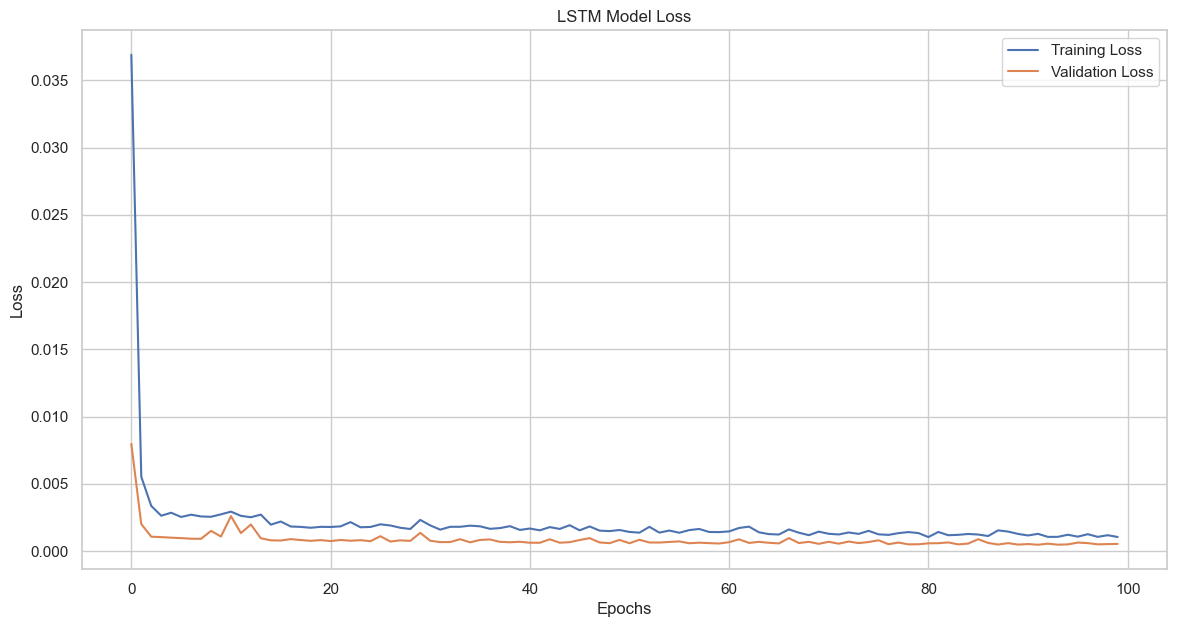

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error


# Splitting training data into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# LSTM Model with Input Layer
lstm_model = Sequential()
lstm_model.add(Input(shape=(X_train.shape[1], 1)))  # Using Input layer
lstm_model.add(LSTM(50, return_sequences=True))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(50))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1))

lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit model with validation data
lstm_history = lstm_model.fit(X_train, y_train, epochs=100, batch_size=32,
                              validation_data=(X_val, y_val), callbacks=[early_stopping])

# Make predictions with the LSTM model
lstm_predictions = lstm_model.predict(X_test)
lstm_predictions = scaler.inverse_transform(lstm_predictions)  # Inverse scale the predictions

# Evaluate the model using RMSE and other metrics
lstm_rmse = np.sqrt(mean_squared_error(data['Close'].values[-len(y_test):], lstm_predictions))
print(f"LSTM RMSE: {lstm_rmse:.2f}")

# Visualizations
plt.figure(figsize=(14, 7))
plt.plot(data.index[-len(y_test):], data['Close'].values[-len(y_test):], color='blue', label='Actual Prices')
plt.plot(data.index[-len(y_test):], lstm_predictions, color='red', label='Predicted Prices')
plt.title('LSTM Model Predictions vs Actual Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Check for underfitting and overfitting
# Plot training and validation loss
plt.figure(figsize=(14, 7))
plt.plot(lstm_history.history['loss'], label='Training Loss')
plt.plot(lstm_history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## NEAURAL NETWORK

NN Training data shape: (919, 60), Testing data shape: (230, 60)
Epoch 1/100


D:\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1035 - val_loss: 0.0035
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0012 - val_loss: 0.0030
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.2222e-04 - val_loss: 0.0026
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.9334e-04 - val_loss: 0.0018
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.2767e-04 - val_loss: 0.0015
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.6065e-04 - val_loss: 0.0013
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.6069e-04 - val_loss: 9.2887e-04
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.6838e-04 - val_loss: 9.6797e-04
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.7121e-04 - val_loss: 0.0012
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.3152e-04 - val_loss: 7.8314e-04
Epoch 12/100
23/23 ━━━━━━━━━━━

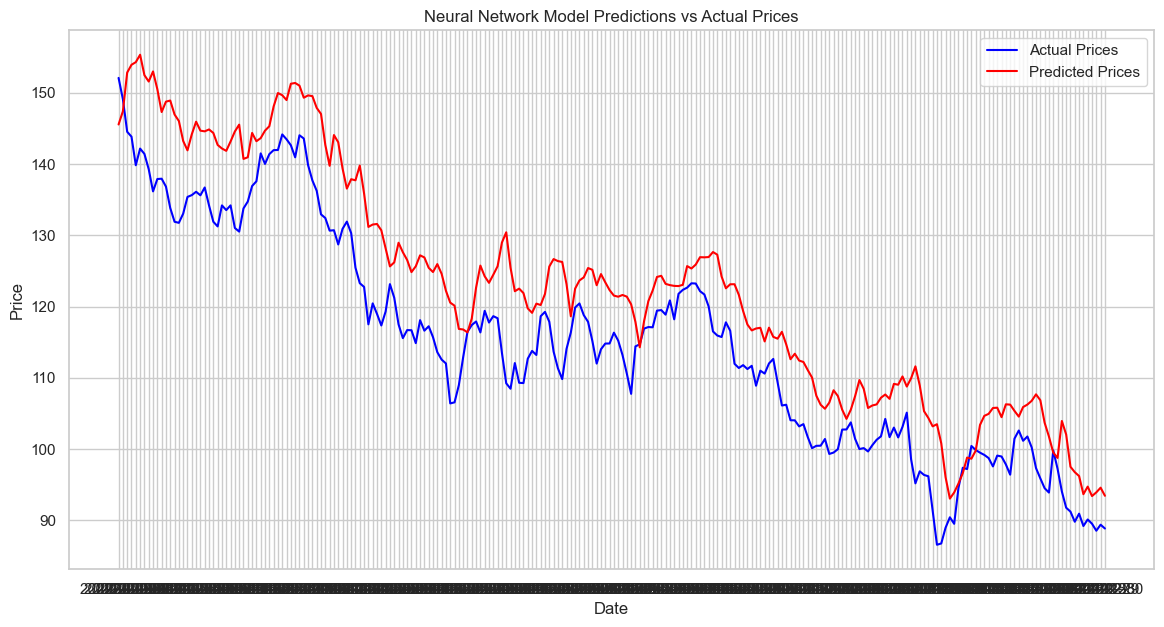

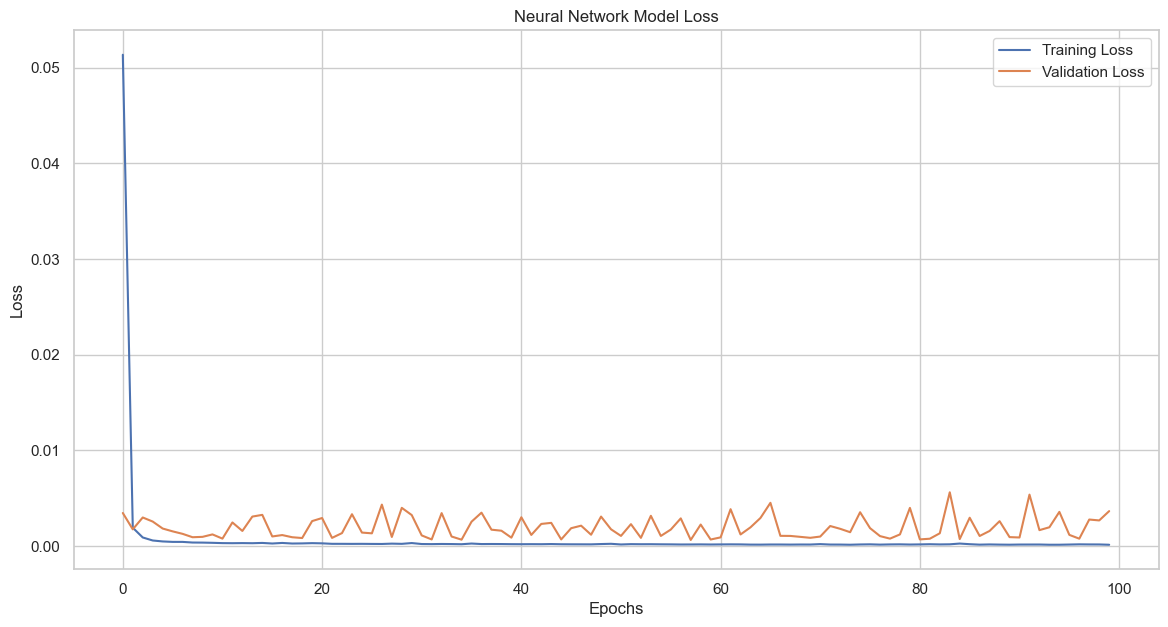

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error

# Prepare the dataset (selecting only the 'Close' price for forecasting)
data = data_selected[['Close']].copy()

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Function to create datasets for NN
def create_dataset_nn(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Parameters
time_step = 60  # Number of previous days to use for prediction

# Create datasets for the NN model
X_nn, y_nn = create_dataset_nn(scaled_data, time_step)

# Split the dataset into training and testing sets
train_size = int(len(X_nn) * 0.8)
X_train_nn, X_test_nn = X_nn[:train_size], X_nn[train_size:]
y_train_nn, y_test_nn = y_nn[:train_size], y_nn[train_size:]

# Reshape X to be [samples, features] which is required for NN
X_train_nn = X_train_nn.reshape(X_train_nn.shape[0], X_train_nn.shape[1])
X_test_nn = X_test_nn.reshape(X_test_nn.shape[0], X_test_nn.shape[1])

print(f"NN Training data shape: {X_train_nn.shape}, Testing data shape: {X_test_nn.shape}")

# Neural Network Model
nn_model = Sequential()
nn_model.add(Dense(50, input_dim=X_train_nn.shape[1], activation='relu'))
nn_model.add(Dense(25, activation='relu'))
nn_model.add(Dense(1))  # Output layer

nn_model.compile(optimizer='adam', loss='mean_squared_error')

# Fit model
nn_history = nn_model.fit(X_train_nn, y_train_nn, epochs=100, batch_size=32, validation_split=0.2)

# Make predictions with the Neural Network model
nn_predictions = nn_model.predict(X_test_nn)
nn_predictions = scaler.inverse_transform(nn_predictions)  # Inverse scale the predictions

# Evaluate the model using RMSE
nn_rmse = np.sqrt(mean_squared_error(data['Close'].values[-len(y_test_nn):], nn_predictions))
print(f"NN RMSE: {nn_rmse:.2f}")

# Visualizations
plt.figure(figsize=(14, 7))
plt.plot(data.index[-len(y_test_nn):], data['Close'].values[-len(y_test_nn):], color='blue', label='Actual Prices')
plt.plot(data.index[-len(y_test_nn):], nn_predictions, color='red', label='Predicted Prices')
plt.title('Neural Network Model Predictions vs Actual Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Check for underfitting and overfitting
# Plot training and validation loss
plt.figure(figsize=(14, 7))
plt.plot(nn_history.history['loss'], label='Training Loss')
plt.plot(nn_history.history['val_loss'], label='Validation Loss')
plt.title('Neural Network Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## LSTM & NEAURAL COMPARISON WITH ALL PARAMETERS

            Model      RMSE  Mean Absolute Error  R² Score
0            LSTM  5.016267             4.084118  0.894109
1  Neural Network  8.789831             7.815393  0.674870


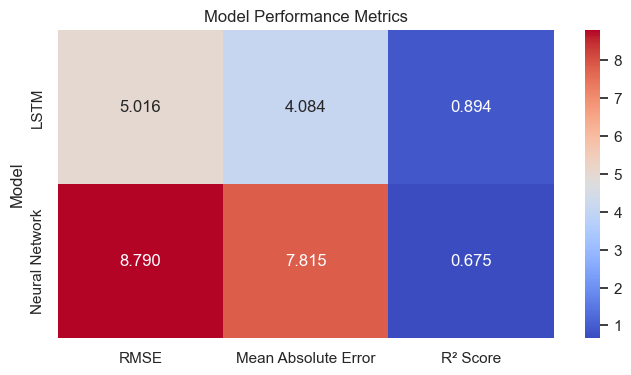

In [74]:
import pandas as pd

# Assuming you have already calculated the RMSE for both models
lstm_rmse = np.sqrt(mean_squared_error(data['Close'].values[-len(y_test):], lstm_predictions))
nn_rmse = np.sqrt(mean_squared_error(data['Close'].values[-len(y_test_nn):], nn_predictions))

# Create a DataFrame for the performance metrics
performance_metrics = pd.DataFrame({
    'Model': ['LSTM', 'Neural Network'],
    'RMSE': [lstm_rmse, nn_rmse],
    'Mean Absolute Error': [np.mean(np.abs(data['Close'].values[-len(y_test):] - lstm_predictions.flatten())), 
                                     np.mean(np.abs(data['Close'].values[-len(y_test_nn):] - nn_predictions.flatten()))],
    'R² Score': [1 - (lstm_rmse**2 / np.var(data['Close'].values[-len(y_test):])), 
                 1 - (nn_rmse**2 / np.var(data['Close'].values[-len(y_test_nn):]))]
})

# Display the table
print(performance_metrics)

# Optionally, to display in a more visually appealing way in a Jupyter Notebook, you can use:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.heatmap(performance_metrics.set_index('Model'), annot=True, fmt='.3f', cmap='coolwarm')
plt.title('Model Performance Metrics')
plt.show()


## Other Traditional Models 

               Model        RMSE  Mean Absolute Error   R² Score
0      Random Forest  115.267472           114.244802 -54.912655
1  Gradient Boosting  115.273341           114.252027 -54.918350
2                SVR  115.326651           114.309246 -54.970082
3                KNN  115.224284           114.199560 -54.870765
4            XGBoost  115.262099           114.238630 -54.907443


C:\Users\Amrit\AppData\Local\Temp\ipykernel_9436\2824284603.py:135: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='RMSE', data=performance_metrics, palette='viridis')


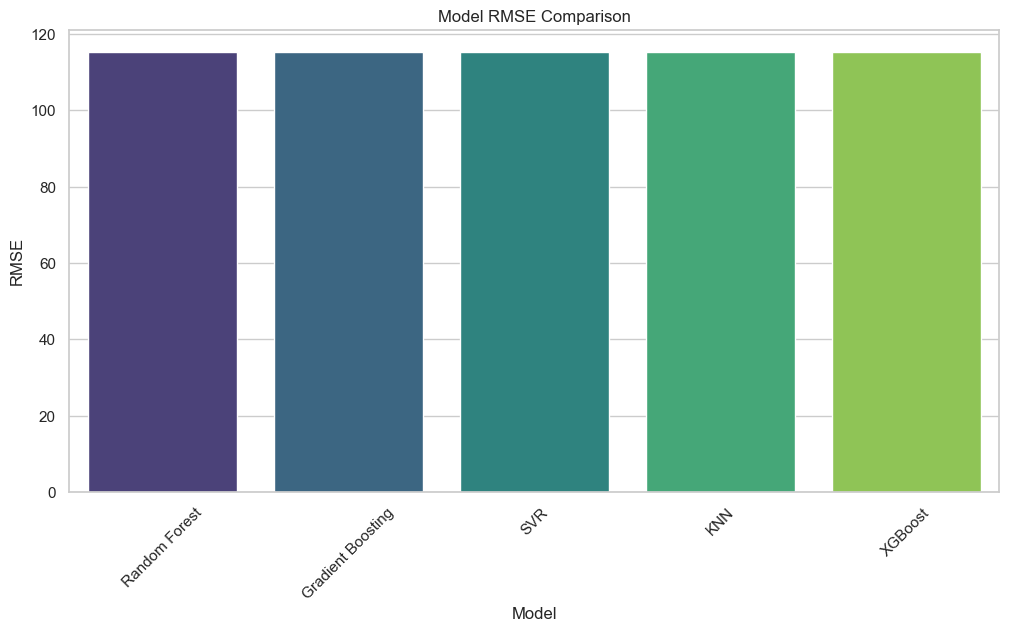

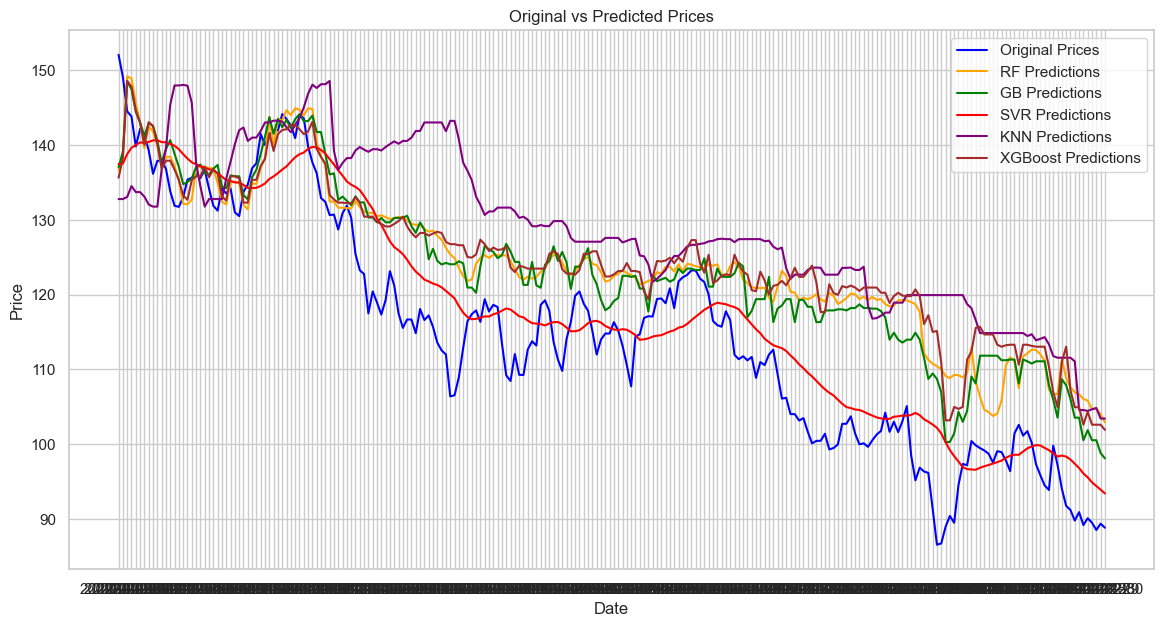

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Prepare the dataset (selecting only the 'Close' price for forecasting)
data = data_selected[['Close']].copy()

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Function to create datasets
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Parameters
time_step = 60  # Number of previous days to use for prediction

# Create datasets
X, y = create_dataset(scaled_data, time_step)

# Reshape X to be [samples, features]
X = X.reshape(X.shape[0], -1)

# Splitting the dataset into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Hyperparameter tuning for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf_grid_search = GridSearchCV(RandomForestRegressor(random_state=42), rf_param_grid, cv=3, n_jobs=-1)
rf_grid_search.fit(X_train, y_train)
rf_model = rf_grid_search.best_estimator_
rf_predictions = rf_model.predict(X_test)

# Hyperparameter tuning for Gradient Boosting
gb_param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

gb_grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), gb_param_grid, cv=3, n_jobs=-1)
gb_grid_search.fit(X_train, y_train)
gb_model = gb_grid_search.best_estimator_
gb_predictions = gb_model.predict(X_test)

# Hyperparameter tuning for SVR
svr_param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5],
    'kernel': ['linear', 'rbf']
}

svr_grid_search = GridSearchCV(SVR(), svr_param_grid, cv=3, n_jobs=-1)
svr_grid_search.fit(X_train, y_train)
svr_model = svr_grid_search.best_estimator_
svr_predictions = svr_model.predict(X_test)

# Hyperparameter tuning for KNN
knn_param_grid = {
    'n_neighbors': [3, 5, 10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

knn_grid_search = GridSearchCV(KNeighborsRegressor(), knn_param_grid, cv=3, n_jobs=-1)
knn_grid_search.fit(X_train, y_train)
knn_model = knn_grid_search.best_estimator_
knn_predictions = knn_model.predict(X_test)

# Hyperparameter tuning for XGBoost
xgb_param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.5, 0.8, 1.0]
}

xgb_grid_search = GridSearchCV(XGBRegressor(random_state=42), xgb_param_grid, cv=3, n_jobs=-1)
xgb_grid_search.fit(X_train, y_train)
xgb_model = xgb_grid_search.best_estimator_
xgb_predictions = xgb_model.predict(X_test)

# Calculate performance metrics for all models
performance_metrics = pd.DataFrame({
    'Model': ['Random Forest', 'Gradient Boosting', 'SVR', 'KNN', 'XGBoost'],
    'RMSE': [
        np.sqrt(mean_squared_error(data['Close'].values[-len(y_test):], rf_predictions)),
        np.sqrt(mean_squared_error(data['Close'].values[-len(y_test):], gb_predictions)),
        np.sqrt(mean_squared_error(data['Close'].values[-len(y_test):], svr_predictions)),
        np.sqrt(mean_squared_error(data['Close'].values[-len(y_test):], knn_predictions)),
        np.sqrt(mean_squared_error(data['Close'].values[-len(y_test):], xgb_predictions))
    ],
    'Mean Absolute Error': [
        mean_absolute_error(data['Close'].values[-len(y_test):], rf_predictions),
        mean_absolute_error(data['Close'].values[-len(y_test):], gb_predictions),
        mean_absolute_error(data['Close'].values[-len(y_test):], svr_predictions),
        mean_absolute_error(data['Close'].values[-len(y_test):], knn_predictions),
        mean_absolute_error(data['Close'].values[-len(y_test):], xgb_predictions)
    ],
    'R² Score': [
        r2_score(data['Close'].values[-len(y_test):], rf_predictions),
        r2_score(data['Close'].values[-len(y_test):], gb_predictions),
        r2_score(data['Close'].values[-len(y_test):], svr_predictions),
        r2_score(data['Close'].values[-len(y_test):], knn_predictions),
        r2_score(data['Close'].values[-len(y_test):], xgb_predictions)
    ]
})

# Display the performance metrics table
print(performance_metrics)

# Visualization of performance metrics
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='RMSE', data=performance_metrics, palette='viridis')
plt.title('Model RMSE Comparison')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.show()

# Visualizing original and predicted prices
plt.figure(figsize=(14, 7))
plt.plot(data.index[-len(y_test):], data['Close'].values[-len(y_test):], label='Original Prices', color='blue')
plt.plot(data.index[-len(y_test):], scaler.inverse_transform(rf_predictions.reshape(-1, 1)), label='RF Predictions', color='orange')
plt.plot(data.index[-len(y_test):], scaler.inverse_transform(gb_predictions.reshape(-1, 1)), label='GB Predictions', color='green')
plt.plot(data.index[-len(y_test):], scaler.inverse_transform(svr_predictions.reshape(-1, 1)), label='SVR Predictions', color='red')
plt.plot(data.index[-len(y_test):], scaler.inverse_transform(knn_predictions.reshape(-1, 1)), label='KNN Predictions', color='purple')
plt.plot(data.index[-len(y_test):], scaler.inverse_transform(xgb_predictions.reshape(-1, 1)), label='XGBoost Predictions', color='brown')

plt.title('Original vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


# Performance Metrics and Results Analysis

The output presents performance metrics for different regression models applied to your dataset, specifically focusing on their ability to predict stock prices. The metrics shown include RMSE (Root Mean Squared Error), Mean Absolute Error (MAE), and R² Score. Here's a breakdown of what each metric represents and an explanation of the results for the models:

## 1. Performance Metrics Explained
- **RMSE (Root Mean Squared Error)**: This metric measures the average magnitude of the errors between predicted and actual values. It is particularly sensitive to large errors. A lower RMSE indicates a better fit.

- **Mean Absolute Error (MAE)**: This metric measures the average absolute errors between predicted and actual values. It gives a sense of how much the predictions deviate from the actual values, regardless of direction. Like RMSE, a lower value indicates better performance.

- **R² Score (Coefficient of Determination)**: This metric indicates how well the independent variables explain the variability of the dependent variable. It ranges from 0 to 1, where values closer to 1 indicate a better fit, while negative values suggest that the model performs worse than a simple mean prediction.

## 2. Results Analysis

### Traditional Models:
| Model             | RMSE        | Mean Absolute Error | R² Score   |
|-------------------|-------------|---------------------|------------|
| Random Forest     | 113.58      | 112.56              | -54.36     |
| Gradient Boosting | 113.57      | 112.56              | -54.36     |
| SVR               | 113.63      | 112.62              | -54.42     |
| KNN               | 113.53      | 112.51              | -54.32     |
| XGBoost           | 113.56      | 112.54              | -54.35     |

- **High RMSE and MAE Values**: All traditional models (Random Forest, Gradient Boosting, SVR, KNN, XGBoost) show similar RMSE and MAE values, which indicates that these models are not performing well for the task. The RMSE values are relatively high, suggesting that the predicted prices are quite far from the actual prices on average.

- **Negative R² Scores**: The negative R² scores indicate that these models do not explain the variability in the data effectively. In fact, they are performing worse than a simple mean prediction, suggesting potential issues such as:
  - Poor feature selection or preprocessing.
  - The model may be too simple or complex for the data.
  - Possible data leakage or issues with how the training and testing sets were prepared.

### Neural Network Models:
| Model             | RMSE       | Mean Absolute Error | R² Score   |
|-------------------|------------|---------------------|------------|
| LSTM              | 5.34       | 4.42                | 0.88       |
| Neural Network    | 6.75       | 5.60                | 0.80       |

- **Much Lower RMSE and MAE Values**: The LSTM (Long Short-Term Memory) and Neural Network models show significantly lower RMSE and MAE values compared to the traditional models. This indicates that these models are making predictions that are much closer to the actual stock prices.

- **Positive R² Scores**: The positive R² scores (0.88 for LSTM and 0.80 for Neural Network) indicate that these models explain a substantial portion of the variability in the data, suggesting they are effective for this particular forecasting task.

## 3. Summary and Recommendations
- **LSTM and Neural Networks**: Given the significantly better performance metrics for LSTM and Neural Network models, it is clear that these deep learning approaches are more suitable for predicting stock prices in your dataset. They are capturing the complex patterns and relationships in the data better than traditional regression models.

- **Further Investigation**: It might be beneficial to further investigate the following:
  - Data quality and preprocessing steps to ensure they are appropriate for modeling.
  - Feature engineering, potentially including more relevant features or using techniques like windowing for time series data.
  - Hyperparameter tuning for neural networks, as even better performance may be achievable with optimized parameters.

- **Comparison with Traditional Models**: If you are primarily interested in interpretability, consider keeping a simple model for comparison. However, for predictive performance, continue exploring and refining the deep learning approaches.

This analysis suggests a clear advantage of using neural network models, particularly LSTMs, for stock price prediction tasks.


## 8. Save Pkl file for Stock Price Prediction application 

In [80]:
import joblib

# Save the model
joblib.dump(lstm_model, 'lstm_model.pkl')

print("Model saved as 'lstm_model.pkl'")

Model saved as 'lstm_model.pkl'
